In [1]:
# Decision Trees Application

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Importing the dataset

dataset=pd.read_csv("data.csv")
dataset.head()
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# split data

X=dataset.iloc[:, 0:13]
y=dataset.iloc[:, 13]
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, test_size=0.20)

In [4]:
# feature scale

sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [5]:
# training the model

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
# confusion matrix

y_pred = dt.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[21,  6],
       [ 8, 26]], dtype=int64)

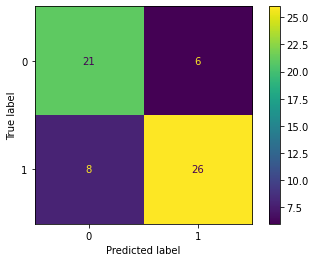

In [7]:
# confusion matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt,X_test,y_test)

In [8]:
# performance criteria

cm=confusion_matrix(y_test,y_pred)
cm

array([[21,  6],
       [ 8, 26]], dtype=int64)

In [9]:
# Accuracy(TN/N)

(cm[0][0]+cm[1][1]) / X_test.shape[0]

0.7704918032786885

In [10]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test,y_pred))

0.7704918032786885


In [11]:
# sensitivity (TP/P) 

cm[0][0]/(cm[0][0]+cm[1][0])

0.7241379310344828

In [12]:
# specificity (TN/N)

cm[1][1]/(cm[1][1]+cm[0][1])

0.8125

In [13]:
# precision (TP/P')

cm[0][0] / (cm[0][0]+cm[0][1])

0.7777777777777778